# Analyzing red wine

## 데이터 컬럼의 이해

### 고정 산도(fixed acidity) - 와인과 관련된 대부분의 산 또는 고정 또는 비휘발성(쉽게 증발하지 않음)
### 휘발성 산도(volatile acidity) - 와인에 있는 아세트산의 양으로 너무 높으면 불쾌한 식초 맛을 유발
### 구연산(citric acid) - 소량으로 발견되는 구연산은 와인에 '신선함'과 풍미를 더할 수 있습니다.
### 잔여 설탕(residual sugar) - 발효가 끝난 후 남은 설탕의 양, 1g/리터 미만의 와인은 드물고 45g/리터 이상의 와인은 달콤한 것으로 간주됩니다.
### 염화물(chlorides) - 포도주에 있는 소금의 양
### 유리 이산화황(free sulfur dioxide) - SO2의 자유 형태는 분자 SO2(용해 가스)와 중아황산 이온 사이의 평형 상태로 존재합니다. 그것은 미생물의 성장과 와인의 산화를 방지합니다.
### 총 이산화황(total sulfur dioxide) - SO2의 자유 및 결합 형태의 양; 낮은 농도의 SO2는 와인에서 대부분 감지할 수 없지만 50ppm 이상의 유리 SO2 농도에서는 와인의 코와 맛에서 SO2가 분명해집니다.
### 밀도(density) - 물의 밀도는 알코올과 당도의 퍼센트에 따라 물의 밀도에 가깝습니다.
### pH - 와인의 산성 또는 염기성 정도를 0(매우 산성)에서 14(매우 염기성) 사이의 척도로 설명합니다. 대부분의 와인은 pH 척도에서 3-4 사이입니다.
### 황산염(sulphates) - 이산화황 가스(S02) 수준에 기여할 수 있는 와인 첨가제로, 항균 및 항산화제 역할을 합니다.
### 알코올(alcohol) - 와인의 알코올 도수
### 등급(quality) - 와인의 등급

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(font_scale=1.2)

In [2]:
df_red = pd.read_csv('D:/pyproject/winequality-red.csv', sep=';')
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
### 데이터 프레임 모양 및 기본정보 확인
display(df_red.shape)  ## 총 1599개 행, 12개의 컬럼으로 이루어져 있다.
display(df_red.info()) ## quality를 제외한 나머지 컬럼 데이터 타입은 float로 이루어져 있고, null값은 없는 것으로 확인
display(df_red.isnull().sum())

(1599, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### - quality를 제외한 모든 속성값이 null값이 없고, float이므로 연속형 변수의 집합으로 판단

In [4]:
### 데이터프레임 describe값 확인
display(df_red.describe().T) ## Transpose한 describe값

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
# 와인 등급별 각 feature 변수값의 평균과의 관계를 확인하기 위한 pivot table 생성
df_red_mean_pergrp = pd.pivot_table(data=df_red, index='quality', aggfunc='mean')
df_red_mean_pergrp = df_red_mean_pergrp.reset_index()
df_red_mean_pergrp

,quality,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,2.635000,0.570000,24.900000,0.884500
1,4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,2.694340,0.596415,36.245283,0.693962
2,5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,2.528855,0.620969,56.513950,0.577041
3,6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,2.477194,0.675329,40.869906,0.497484
4,7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,2.720603,0.741256,35.020101,0.403920
5,8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,2.577778,0.767778,33.444444,0.423333


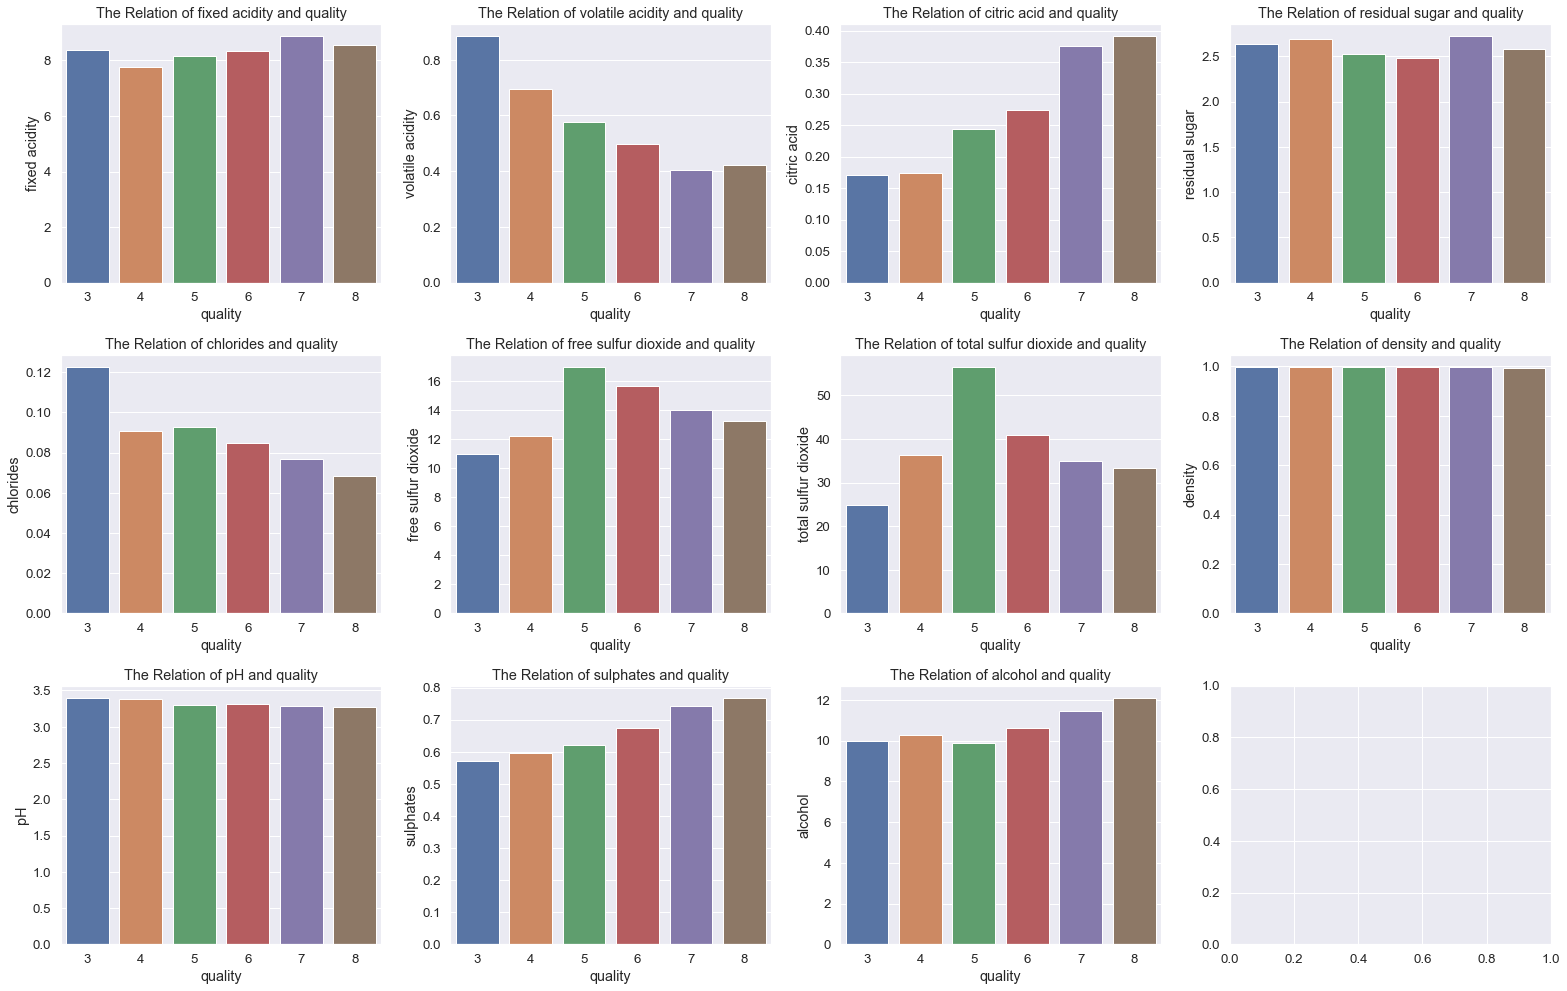

In [6]:
## 와인 등급별 각 feature 변수값의 평균과의 관계 시각화
col1 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']
col2 = ['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']
col3 = ['pH', 'sulphates', 'alcohol']

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(22,14))
for idx, col in enumerate(col1):
    sns.barplot(x = df_red_mean_pergrp['quality'], y = df_red_mean_pergrp[col], ax=ax[0][idx])
    ax[0][idx].set_title('The Relation of {} and quality'.format(col))

for idx, col in enumerate(col2):
    sns.barplot(x = df_red_mean_pergrp['quality'], y = df_red_mean_pergrp[col], ax=ax[1][idx])
    ax[1][idx].set_title('The Relation of {} and quality'.format(col))
    
for idx, col in enumerate(col3):
    sns.barplot(x = df_red_mean_pergrp['quality'], y = df_red_mean_pergrp[col], ax=ax[2][idx])
    ax[2][idx].set_title('The Relation of {} and quality'.format(col))

plt.tight_layout()
plt.show()

### - 휘발성 산도(volatile acidity) 감소는 Quality 향상에 긍정적인 영향이 있을 것으로 확인됨
### - 구연산(citric acid) 힘유량의 증가는 Quality 향상에 긍정적인 영향이 있을 것으로 확인됨
### - 염화물(chlorides) 함유량의 감소는 Quality 향상에 긍정적인 영향이 있을 것으로 확인됨
### - 황산염(sulphates) 함유량 및 알콜 도수의 증가는 Quality 향상에 긍정적인 영향이 있을 것으로 확인됨
### - residual sugar, density, total sulfur dioxide의 경우 Quality에 규칙적인 영향을 미치는 것을 확인하기 어려움

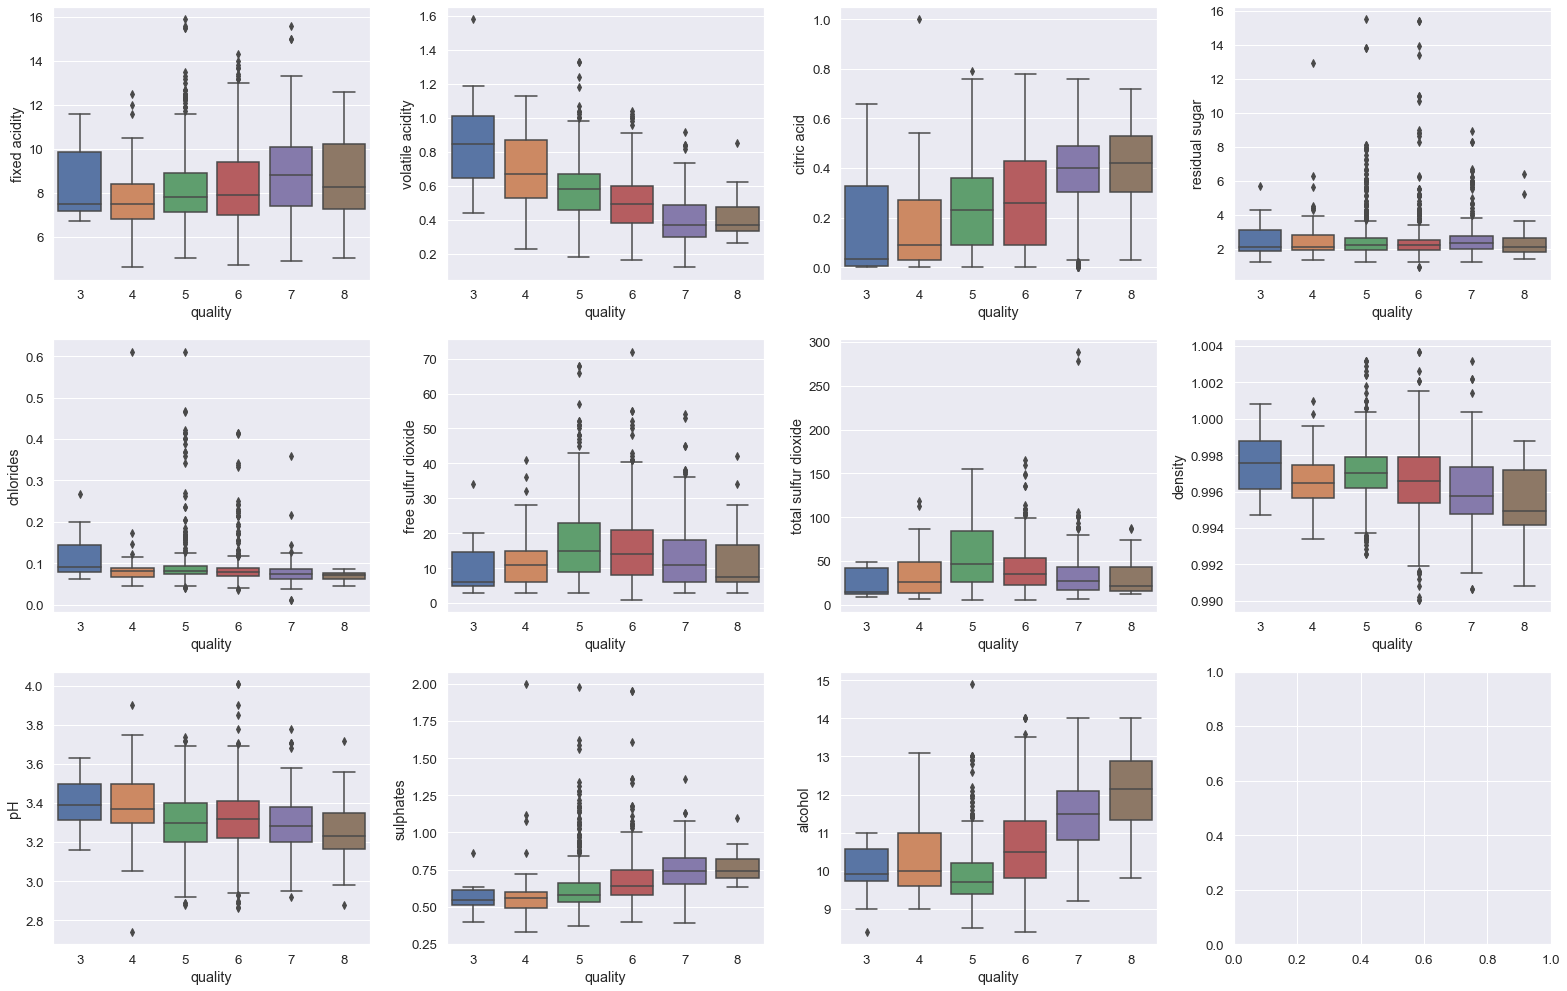

In [7]:
### 퀄리티와 다른 feature간의 관계를 boxplot으로 확인
col1 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']
col2 = ['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']
col3 = ['pH', 'sulphates', 'alcohol']

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(22,14))
for idx, col in enumerate(col1):
    sns.boxplot(data=df_red, x='quality', y=col, ax=ax[0][idx])

for idx, col in enumerate(col2):
    sns.boxplot(data=df_red, x='quality', y=col, ax=ax[1][idx])

for idx, col in enumerate(col3):
    sns.boxplot(data=df_red, x='quality', y=col, ax=ax[2][idx])
    
plt.tight_layout()
plt.show()

 ### - residual sugar, chlorides, free sulfur dioxide, pH, sulphates feature등에 너무 많은 이상값이 있으므로 제거를 고려하는 것이 필요

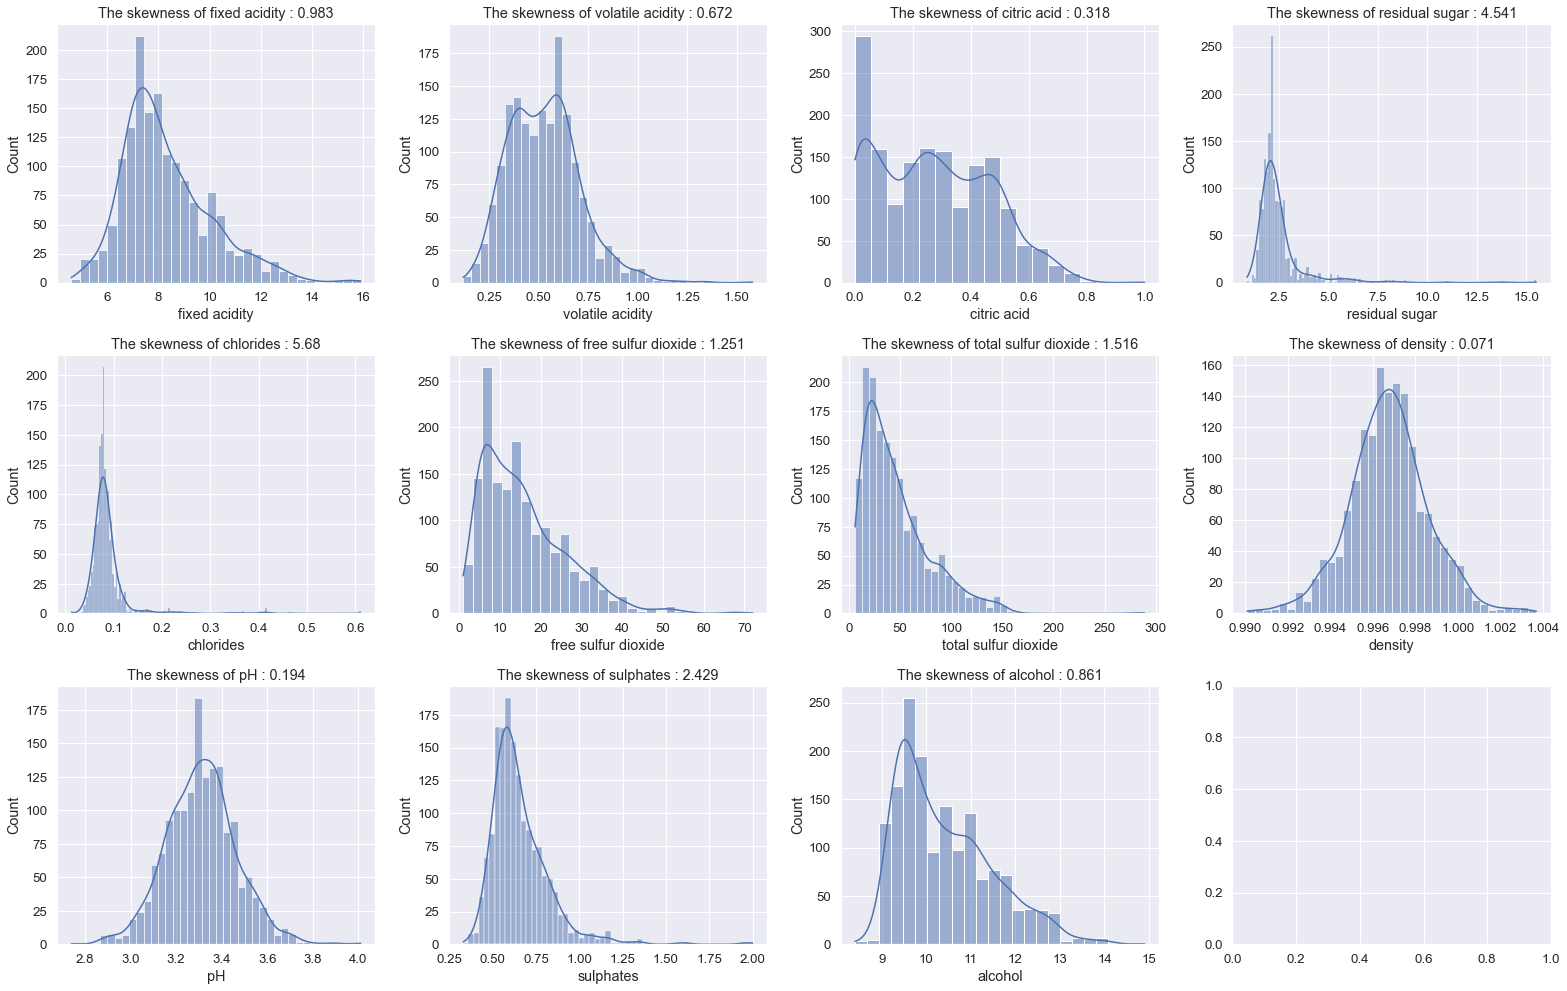

In [8]:
## quality를 제외한 모든 속성값의 histogram 확인
col1 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']
col2 = ['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']
col3 = ['pH', 'sulphates', 'alcohol']

## 히스토 그램 및 각 속성별 왜도(skewness) 정보 시각화
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(22,14))
for idx, col in enumerate(col1):
    sns.histplot(df_red[col], kde=True, ax=ax[0][idx])
    ax[0][idx].set_title('The skewness of {} : {}'.format(col, round(df_red[col].skew(), 3)))

for idx, col in enumerate(col2):
    sns.histplot(df_red[col], kde=True, ax=ax[1][idx])
    ax[1][idx].set_title('The skewness of {} : {}'.format(col, round(df_red[col].skew(), 3)))
    
for idx, col in enumerate(col3):
    sns.histplot(df_red[col], kde=True, ax=ax[2][idx])
    ax[2][idx].set_title('The skewness of {} : {}'.format(col, round(df_red[col].skew(), 3)))

plt.tight_layout()
plt.show()

,skewness
chlorides,5.680
residual sugar,4.541
sulphates,2.429
total sulfur dioxide,1.516
free sulfur dioxide,1.251
fixed acidity,0.983
alcohol,0.861
volatile acidity,0.672
citric acid,0.318
pH,0.194


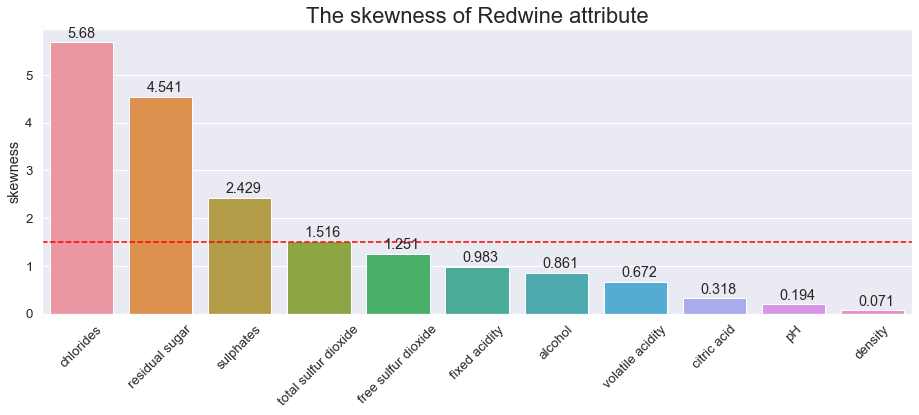

In [9]:
## 왜도 정보 시각화
skew_lst = []
for col in df_red.columns[:-1]:
    skew_lst.append(round(df_red[col].skew(),3))
df_skew = pd.DataFrame(index = df_red.columns[:-1], data=skew_lst, columns=['skewness']).sort_values(by='skewness', ascending=False)
display(df_skew)

plt.figure(figsize=(13,6))
g = sns.barplot(x = df_skew.index, y = df_skew['skewness'])  
g.axhline(1.5, ls='--', color='red')  ## 왜도 임계값 이상 확인을 위한 기준선(1.5이상)

## 그래프 위에 라벨 붙여주기
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.22, p.get_height()+0.1))
plt.xticks(rotation=45)
plt.title('The skewness of Redwine attribute', fontsize=22)
plt.tight_layout()
plt.show()

### - 모델 생성 전, 전처리 수행시 왜도값이 1.5 이상인 속성(chlorides, residual sugar, sulphates, total sulfur dioxide)에 대해서 필요시, skewness 제거 고려 필요(BoxCox 등 활용)

In [10]:
## 각 속성의 정규성 확인(샤피로 윌크 검정 이용)
## 모두 정규성을 만족하지 않는 것을 확인..
from scipy.stats import shapiro
shapiro_pval = []
for col in df_red.iloc[:, :-1].columns:
    shapiro_pval.append(shapiro(df_red[col])[1])
    
df_norm = pd.DataFrame(index=df_red.iloc[:, :-1].columns, data=shapiro_pval, columns=['p-value for shapiro'])
df_norm['is_norm'] = df_norm['p-value for shapiro'].apply(lambda x: "Not Norm" if x < 0.05 else "Norm")
df_norm.sort_values(by='p-value for shapiro', ascending=True)

,p-value for shapiro,is_norm
residual sugar,0.000000e+00,Not Norm
chlorides,0.000000e+00,Not Norm
sulphates,5.821618e-38,Not Norm
total sulfur dioxide,3.574144e-34,Not Norm
free sulfur dioxide,7.697398e-31,Not Norm
alcohol,6.643665e-27,Not Norm
fixed acidity,1.525595e-24,Not Norm
citric acid,1.020820e-21,Not Norm
volatile acidity,2.686807e-16,Not Norm
density,1.940096e-08,Not Norm


### - 각 속성의 정규성 확인(샤피로 윌크 검정 이용)
### - 모두 정규성을 만족하지 않는 것을 확인..(p-value가 0.05보다 작은경우, 귀무가설인 "정규성을 만족한다"를 기각하고 대립가설을 채택)

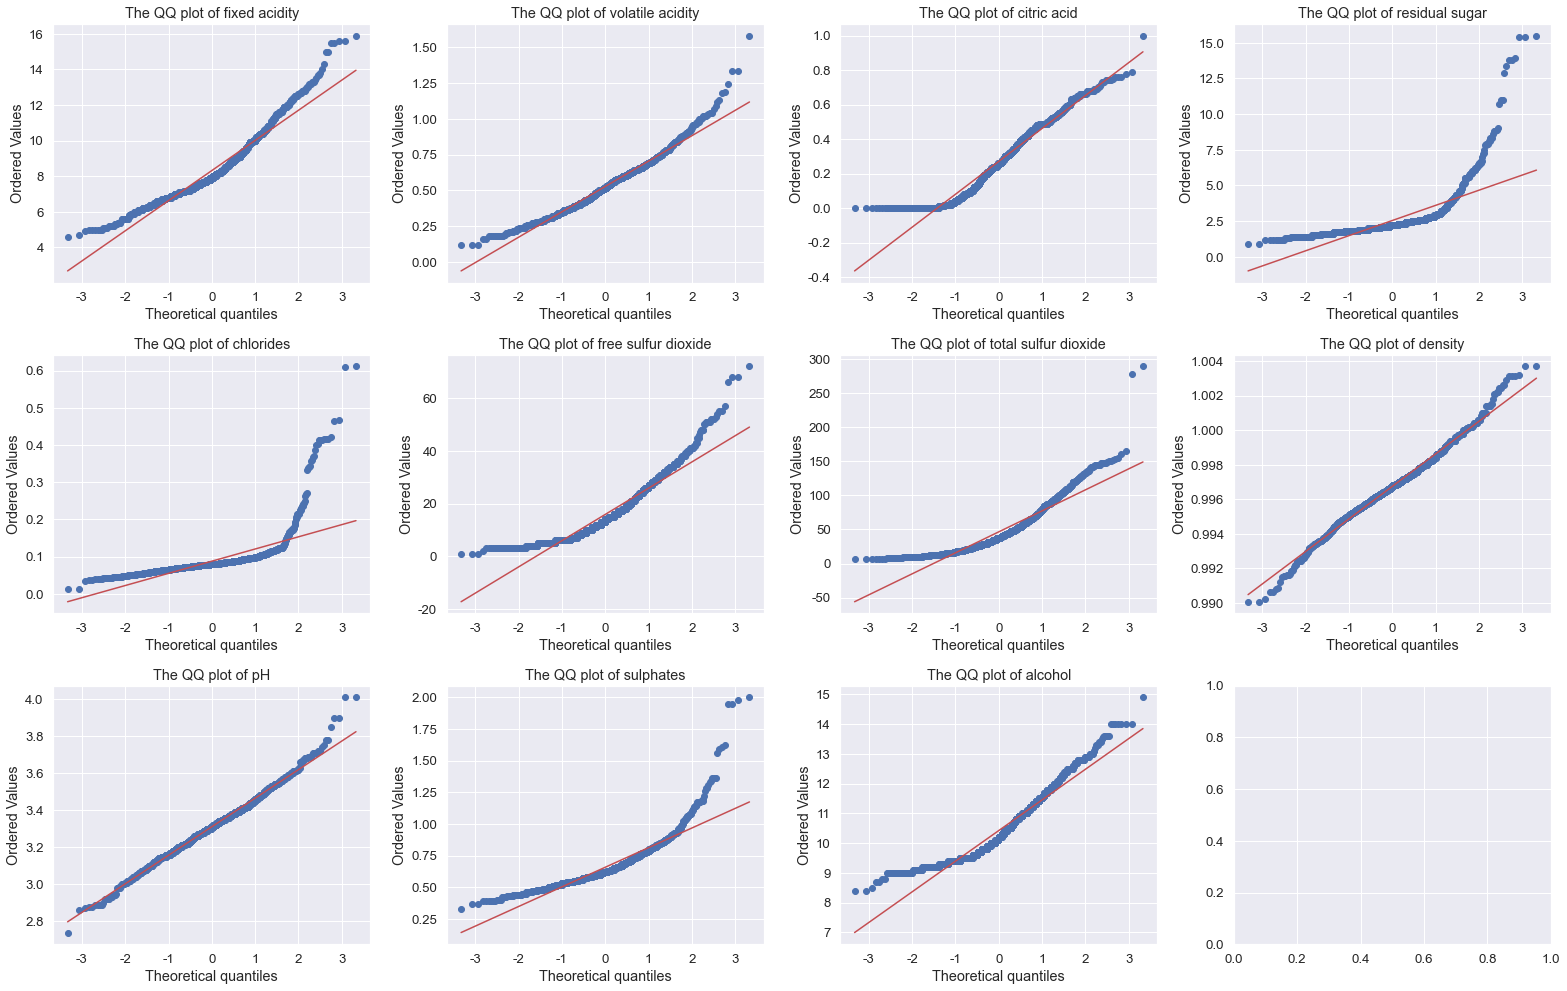

In [11]:
## QQ plot을 활용하여 정규성 만족여부를 시각화로 재확인
## Light-Tailed 의 QQPlot 의 경우 직선 아래로 쳐지게 되며, Heavy-Tailed 의 QQPlot 의 경우 직선 위로 치솟게 되는 형태를 나타냄
import scipy.stats as stats
col1 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']
col2 = ['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']
col3 = ['pH', 'sulphates', 'alcohol']

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(22,14))
for idx, col in enumerate(col1):
    stats.probplot(df_red[col], plot=ax[0][idx])
    ax[0][idx].set_title('The QQ plot of {}'.format(col))
    
for idx, col in enumerate(col2):
    stats.probplot(df_red[col], plot=ax[1][idx])
    ax[1][idx].set_title('The QQ plot of {}'.format(col))
    
for idx, col in enumerate(col3):
    stats.probplot(df_red[col], plot=ax[2][idx])
    ax[2][idx].set_title('The QQ plot of {}'.format(col))
    
plt.tight_layout()
plt.show()

### - residual sugar, chlorides 속성값의 경우 Heavy-Tailed 경향이 매우 뚜렷
### - density, pH 속성값의 경우 정규분포와 매우 유사함을 확인
### - 전반적으로 아래로 볼록한 형태로, 대채적으로 skewness값은 양의 값(왼쪽으로 치우친 형태)을 가짐을 확인할 수 있음

In [12]:
## 변수간 상관관계 분석
corr = df_red.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


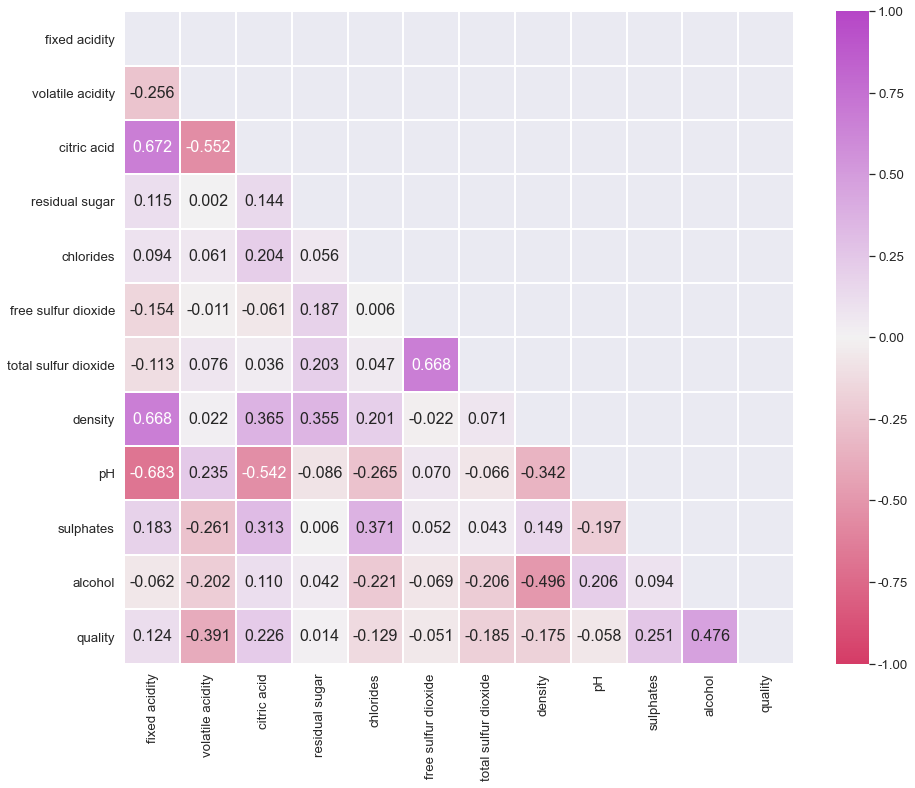

In [13]:
import numpy as np 
fig, ax = plt.subplots(figsize=(15,12))
cmap = sns.diverging_palette(1,300, as_cmap=True)
sns.heatmap(corr, mask=np.triu(np.ones_like(df_red.corr())), 
            cmap=cmap, vmax=1, vmin=-1, center=0, linewidth=2, annot=True, fmt=".3f",annot_kws={'size':16})
plt.show()

### 1) 알콜은 레드와인 퀄리티와 양의 상관관계를 보임
### 2) 휘발성 산도와 레드와인 퀄리티와 음의 상관관계를 보임
### 3) 알콜은 pH값과 약한 양의 상관관계를 보임
### 4) 구연산과 밀도는 고정된 산도와 강한 양의 상관관계를 보임
### 5) pH는 밀도, 고정 산도, 구연산 및 황산염과 음의 상관관계를 보임

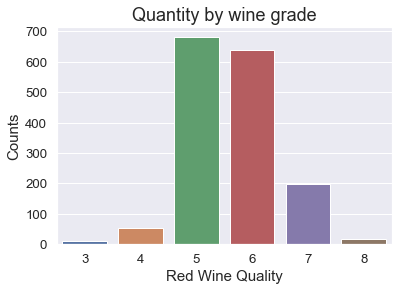

In [14]:
sns.barplot(x=df_red['quality'].value_counts().index, y=df_red['quality'].value_counts().values)
plt.xlabel('Red Wine Quality', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Quantity by wine grade', fontsize=18)
plt.show()
## 대부분의 quality 등급이 5~6등급에 분포되어 있음

In [15]:
## feature간 상관관계 분석(VIF 기준)
X = df_red.iloc[:, :-1]

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
VIF_dict = dict()
for col in X.columns:
    model = LR.fit(X.drop(columns=col), X[col])
    r2 = model.score(X.drop(columns=col), X[col])
    VIF = 1 / (1-r2)   ### r2값이 커질수록 VIF가 커짐
    VIF_dict[col] = VIF
    
df_VIF = pd.DataFrame(index=VIF_dict.keys(), data=VIF_dict.values(), columns=['VIF_val'])
df_VIF.sort_values(by = 'VIF_val', ascending=False)

,VIF_val
fixed acidity,7.767512
density,6.343760
pH,3.329732
citric acid,3.128022
alcohol,3.031160
total sulfur dioxide,2.186813
free sulfur dioxide,1.963019
volatile acidity,1.789390
residual sugar,1.702588
chlorides,1.481932


### - 한 feature를 라벨로 간주하고, 해당라벨을 예측하는데 활용한 다른 feature를 사용한 회귀 모델이 높은 r2값을 갖는 경우, 해당 feature가 다른 feature와 상관성이 있다고 판단하는데 활용할 수 있는 방법
### - 여기서는 특징간 상관관계가 크게 높지 않은(VIF 10 이하) 상태로 확인되어, 변수간 상관관계 정도가 크지는 않는 형태
### - [참고]r2 값은 각 상관계수값을 제곱한 값과 같다

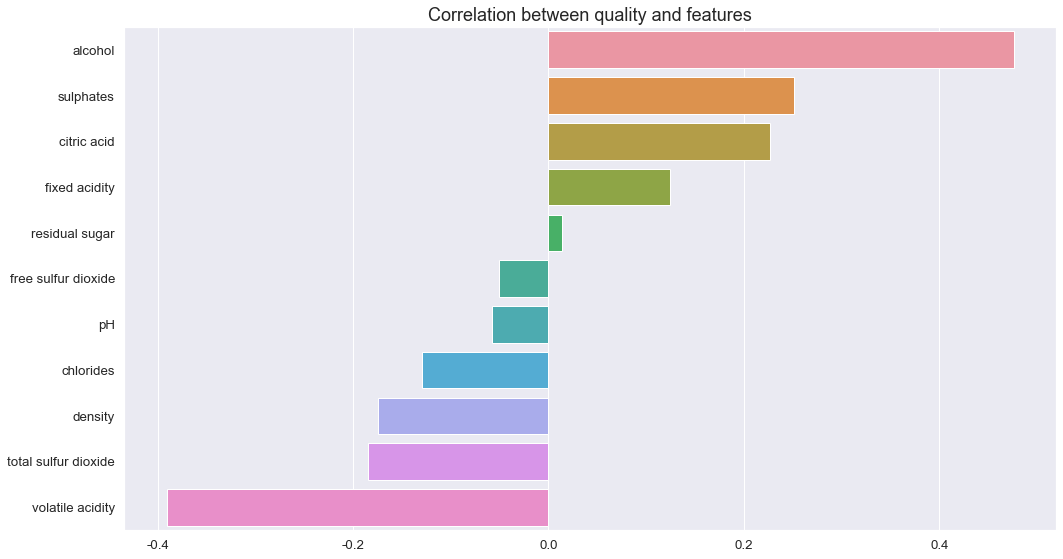

In [16]:
### quality와의 상관관계 시각화
plt.figure(figsize=(15,8))
x_ax = df_red.corr()['quality'].sort_values(ascending=False)[1:].index
y_ax = df_red.corr()['quality'].sort_values(ascending=False)[1:].values
ax = sns.barplot(y=x_ax, x=y_ax)
ax.set_title('Correlation between quality and features', fontsize=18)
plt.tight_layout()
plt.show()

In [17]:
import itertools

comb_lst = []
for c in itertools.combinations(df_red.columns[:-1], 2):
    comb_lst.append(list(c))
print(comb_lst)

[['fixed acidity', 'volatile acidity'], ['fixed acidity', 'citric acid'], ['fixed acidity', 'residual sugar'], ['fixed acidity', 'chlorides'], ['fixed acidity', 'free sulfur dioxide'], ['fixed acidity', 'total sulfur dioxide'], ['fixed acidity', 'density'], ['fixed acidity', 'pH'], ['fixed acidity', 'sulphates'], ['fixed acidity', 'alcohol'], ['volatile acidity', 'citric acid'], ['volatile acidity', 'residual sugar'], ['volatile acidity', 'chlorides'], ['volatile acidity', 'free sulfur dioxide'], ['volatile acidity', 'total sulfur dioxide'], ['volatile acidity', 'density'], ['volatile acidity', 'pH'], ['volatile acidity', 'sulphates'], ['volatile acidity', 'alcohol'], ['citric acid', 'residual sugar'], ['citric acid', 'chlorides'], ['citric acid', 'free sulfur dioxide'], ['citric acid', 'total sulfur dioxide'], ['citric acid', 'density'], ['citric acid', 'pH'], ['citric acid', 'sulphates'], ['citric acid', 'alcohol'], ['residual sugar', 'chlorides'], ['residual sugar', 'free sulfur dio

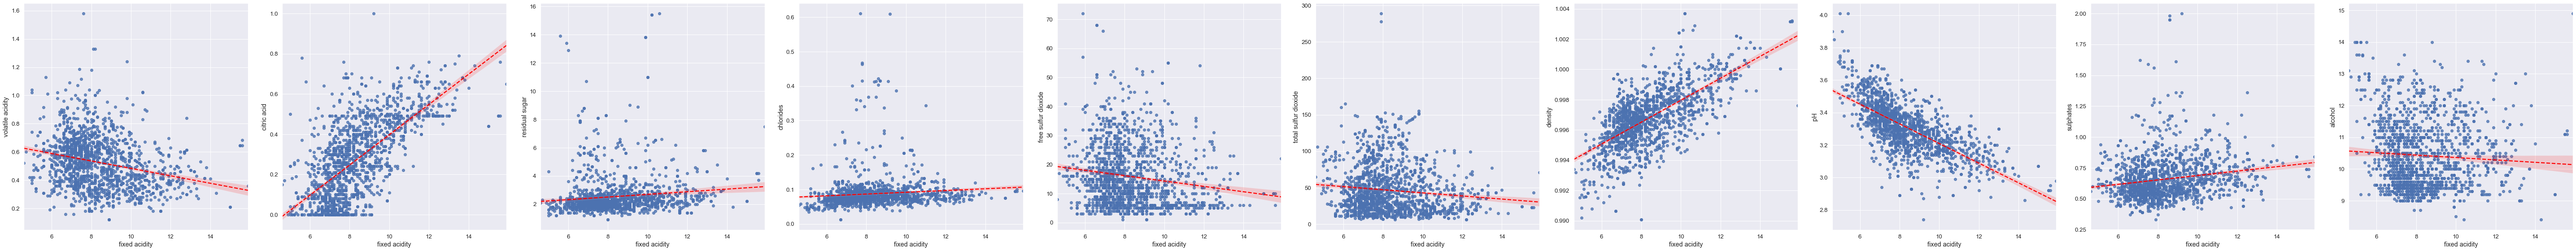

In [18]:
### 각 feature간 상관관계를 확인하기 위한 regplot 구현
### 너무 많아서 10개만..
fig, ax = plt.subplots(1, len(comb_lst[:10]), figsize=(80,8))

for i in range(len(comb_lst[:10])):
    sns.regplot(data=df_red, x=comb_lst[i][0], y=comb_lst[i][1], fit_reg=True, line_kws={'color':'red', 'linestyle':'--'}, ax=ax[i])

plt.tight_layout()
plt.show()

# 데이터 전처리(일부 feature대상 skewness 제거)
### 대상 : 'fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol', 'volatile acidity'
### 모두 양수값이므로 boxcox 변환 활용

In [825]:
df_red_no_skew = df_red.copy()
df_red_no_skew

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [826]:
from scipy.stats import boxcox 
skewed_col = ['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']
for col in skewed_col:
    df_red_no_skew[col] = boxcox(df_red_no_skew[col])[0]

# 이상치 데이터 제거

In [827]:
## 이상치 데이터 제거 함수 구현
def detect_outliers(df,features):
    from collections import Counter
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3st quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces 
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = [i for i, v in outlier_indices.items() if v > 1.5] 
    
    return multiple_outliers

In [828]:
display(df_red_no_skew.loc[detect_outliers(df_red_no_skew, df_red_no_skew.columns[:-1])].index)
print(len(df_red_no_skew.loc[detect_outliers(df_red_no_skew, df_red_no_skew.columns[:-1])].index))

Int64Index([  45,   94,   95,  442,  553,  554,  555,  557,  588,  652,  695,
             821, 1114, 1228, 1270, 1321,   38,  120, 1299,  151,  161,  324,
             325,  396,  400,  480, 1017, 1018, 1079, 1081, 1316, 1374, 1434,
            1435, 1474, 1476, 1558,   17,   19,   81,   83,  106,  169,  181,
             226,  240,  258,  281,  353,  451,  482,  483,  515,  614,  689,
             692,  754,  795,  836,  837, 1051, 1165, 1260, 1319, 1370, 1371,
            1372,  415],
           dtype='int64')

68


In [829]:
outlier_index = df_red_no_skew.loc[detect_outliers(df_red_no_skew, df_red_no_skew.columns[:-1])].index

In [830]:
df_red_no_skew_olier = df_red_no_skew.drop(outlier_index, axis=0).reset_index(drop=True)
df_red_no_skew_olier

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.103306,0.700,0.00,0.450049,0.076,2.867882,3.861490,0.99780,3.51,0.56,0.300482,5
1,1.116875,0.880,0.00,0.572939,0.098,4.102521,4.686835,0.99680,3.20,0.68,0.300504,5
2,1.116875,0.760,0.04,0.530233,0.092,3.317116,4.421290,0.99700,3.26,0.65,0.300504,5
3,1.198255,0.280,0.56,0.450049,0.075,3.504207,4.550629,0.99800,3.16,0.58,0.300504,6
4,1.103306,0.700,0.00,0.450049,0.076,2.867882,3.861490,0.99780,3.51,0.56,0.300482,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1526,1.054038,0.600,0.08,0.473382,0.090,4.503448,4.171856,0.99490,3.45,0.58,0.300535,5
1527,1.039149,0.550,0.10,0.513157,0.062,4.835265,4.351412,0.99512,3.52,0.76,0.300559,6
1528,1.058737,0.510,0.13,0.530233,0.076,4.341848,4.056652,0.99574,3.42,0.75,0.300553,6
1529,1.039149,0.645,0.12,0.473382,0.075,4.503448,4.171856,0.99547,3.57,0.71,0.300523,5


## 모델 학습(여기서는 랜덤포레스트 활용(하이퍼파라미터 조정 포함))

In [831]:
## 이진 분류를 위해 qaulity 데이터를 0(2<quality<6.5), 1(나머지)로 변환
bins = (2, 6.5, 8)
labels = [0, 1]
df_red_no_skew_olier['quality'] = pd.cut(x = df_red_no_skew_olier['quality'], bins = bins, labels = labels)

In [832]:
df_red_no_skew_olier #### 최종 데이터

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.103306,0.700,0.00,0.450049,0.076,2.867882,3.861490,0.99780,3.51,0.56,0.300482,0
1,1.116875,0.880,0.00,0.572939,0.098,4.102521,4.686835,0.99680,3.20,0.68,0.300504,0
2,1.116875,0.760,0.04,0.530233,0.092,3.317116,4.421290,0.99700,3.26,0.65,0.300504,0
3,1.198255,0.280,0.56,0.450049,0.075,3.504207,4.550629,0.99800,3.16,0.58,0.300504,0
4,1.103306,0.700,0.00,0.450049,0.076,2.867882,3.861490,0.99780,3.51,0.56,0.300482,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1526,1.054038,0.600,0.08,0.473382,0.090,4.503448,4.171856,0.99490,3.45,0.58,0.300535,0
1527,1.039149,0.550,0.10,0.513157,0.062,4.835265,4.351412,0.99512,3.52,0.76,0.300559,0
1528,1.058737,0.510,0.13,0.530233,0.076,4.341848,4.056652,0.99574,3.42,0.75,0.300553,0
1529,1.039149,0.645,0.12,0.473382,0.075,4.503448,4.171856,0.99547,3.57,0.71,0.300523,0


In [833]:
df_red_no_skew_olier['quality'].value_counts() ### 데이터의 분포 편차가 큼

0    1323
1     208
Name: quality, dtype: int64

In [834]:
X = df_red_no_skew_olier.iloc[:, :-1]   ## feature
y = df_red_no_skew_olier.iloc[:, -1]    ## labels

In [835]:
### 종속변수 데이터 imbalance 문제 해결을 위해 
# 1) 데이터셋 분리 후..
# 2) train dataset에 SMOTE적용
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=34)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1224, 11) (307, 11) (1224,) (307,)


In [836]:
y_train.value_counts() ## 라벨 데이터 imbalance

0    1060
1     164
Name: quality, dtype: int64

In [837]:
## 라벨 데이터 imbalance로 인해 SMOTE를 이용하여 train data oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=34)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)
print(x_train_over.shape, y_train_over.shape)
print(y_train_over.value_counts())

(2120, 11) (2120,)
0    1060
1    1060
Name: quality, dtype: int64


In [838]:
### feature scaling 작업 수행(x_train_over, x_test데이터셋에 대해..)
scaler = StandardScaler()
x_train_over_std = scaler.fit_transform(x_train_over)  ### 스케일링 된 x_train_over 데이터
x_test_std = scaler.transform(x_test)                  ### 스케일링 된 x_test 데이터

In [839]:
## 랜덤 포레스트 학습 모델링
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
rfc = RandomForestClassifier(max_depth=18, n_estimators=200, random_state=34)  ## grid search cv를 통해 구한 최적 파라미터 입력

In [840]:
rfc.fit(x_train_over_std, y_train_over) ## 학습 진행

RandomForestClassifier(max_depth=18, n_estimators=200, random_state=34)

In [841]:
y_pred = rfc.predict(x_test_std)  ## 예측 수행

In [842]:
accuracy_score(y_test, y_pred)  ### 테스트 데이터셋에 대한 정확도 결과(92%)

0.9218241042345277

In [843]:
print(classification_report(y_test, y_pred))       ## classification report 출력
print(confusion_matrix(y_test, y_pred))            ## confusion matrix 출력

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       263
           1       0.71      0.77      0.74        44

    accuracy                           0.92       307
   macro avg       0.83      0.86      0.85       307
weighted avg       0.93      0.92      0.92       307

[[249  14]
 [ 10  34]]
